In [1]:
import pandas as pd

df=pd.read_csv('Crop_recommendation.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


# List to store outlier information
outlier_info = []

# Iterate over each crop
for crop in df['label'].unique():
    crop_data = df[df['label'] == crop]
    
    # Calculate z-scores for all features
    z_scores = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].apply(zscore)
    
    # Check for outliers (z-score > 3 or z-score < -3)
    outliers = (np.abs(z_scores) > 3).sum()
    
    # Store the outlier count and crop information
    outlier_info.append({
        'Crop': crop,
        'N_outliers': outliers['N'],
        'P_outliers': outliers['P'],
        'K_outliers': outliers['K'],
        'Temperature_outliers': outliers['temperature'],
        'Humidity_outliers': outliers['humidity'],
        'pH_outliers': outliers['ph'],
        'Rainfall_outliers': outliers['rainfall']
    })

# Convert outlier information to DataFrame
outlier_df = pd.DataFrame(outlier_info)

print(outlier_df)


           Crop  N_outliers  P_outliers  K_outliers  Temperature_outliers  \
0          rice           0           0           0                     0   
1         maize           0           0           0                     0   
2      chickpea           0           0           0                     0   
3   kidneybeans           0           0           0                     0   
4    pigeonpeas           0           0           0                     0   
5     mothbeans           0           0           0                     0   
6      mungbean           0           0           0                     0   
7     blackgram           0           0           0                     0   
8        lentil           0           0           0                     0   
9   pomegranate           0           0           0                     0   
10       banana           0           0           0                     0   
11        mango           0           0           0                     0   

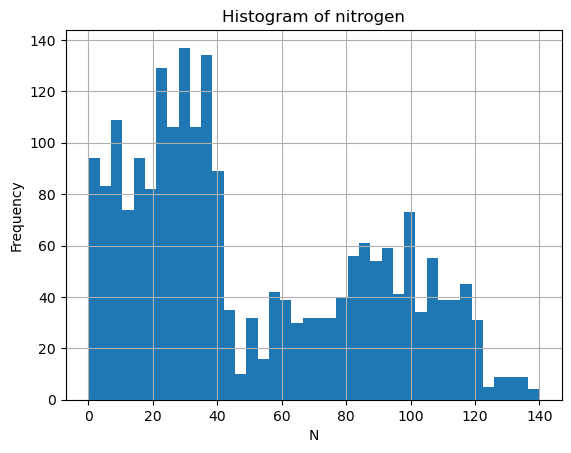

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df['N'].hist(bins=40)
plt.title('Histogram of nitrogen')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()

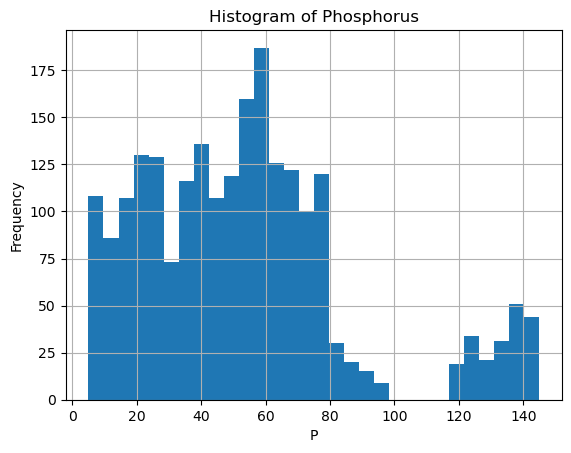

In [7]:
df['P'].hist(bins=30)
plt.title('Histogram of Phosphorus')
plt.xlabel('P')
plt.ylabel('Frequency')
plt.show()

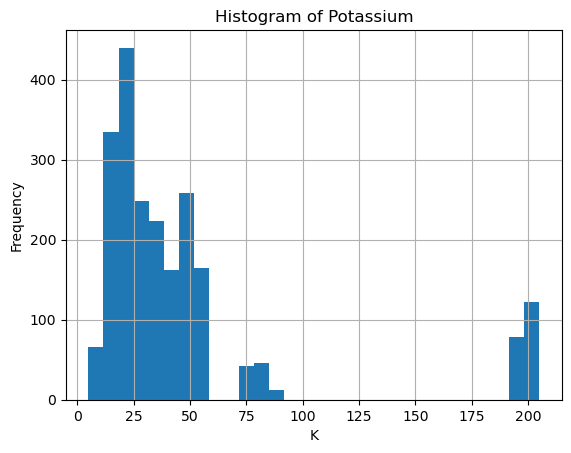

In [8]:
df['K'].hist(bins=30)
plt.title('Histogram of Potassium')
plt.xlabel('K')
plt.ylabel('Frequency')
plt.show()

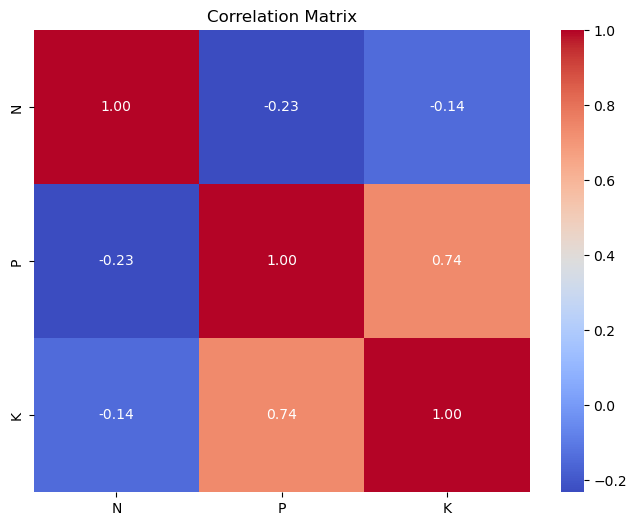

In [9]:



# Correlation matrix
correlation_matrix = df[['N', 'P', 'K']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




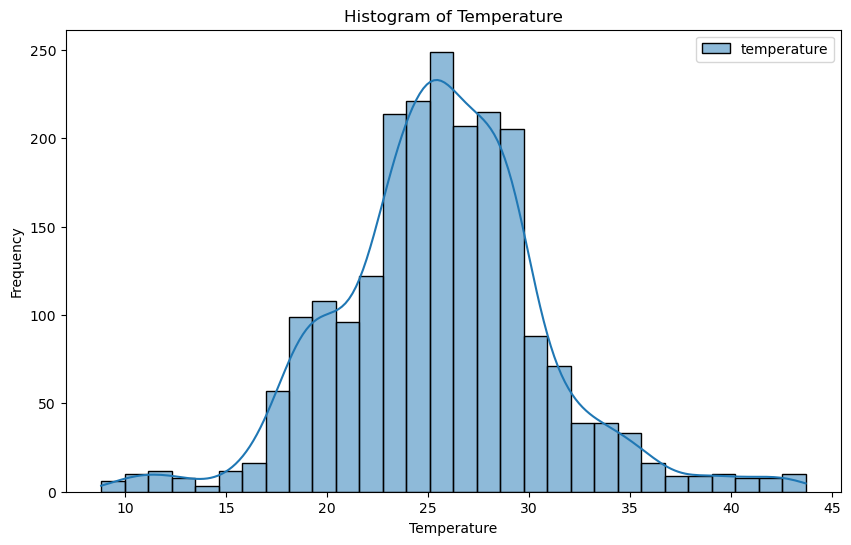

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df[['temperature']], kde=True, bins=30)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


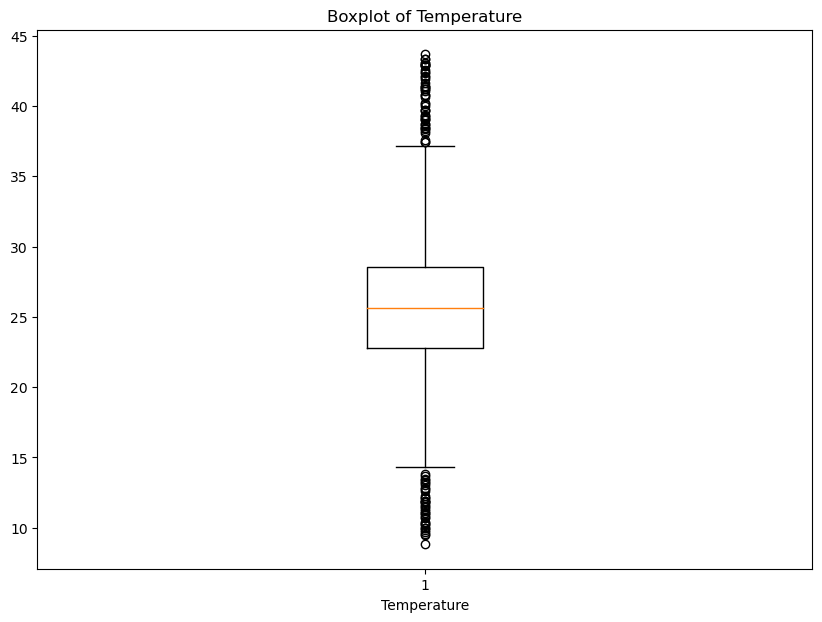

In [11]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df[['temperature']])
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')
# show plot
plt.show()


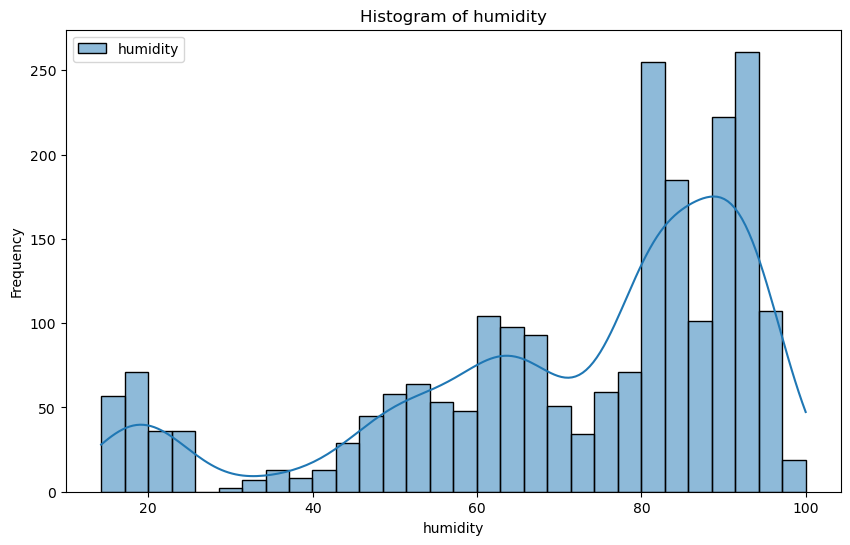

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df[['humidity']], kde=True, bins=30)
plt.title('Histogram of humidity')
plt.xlabel('humidity')
plt.ylabel('Frequency')
plt.show()

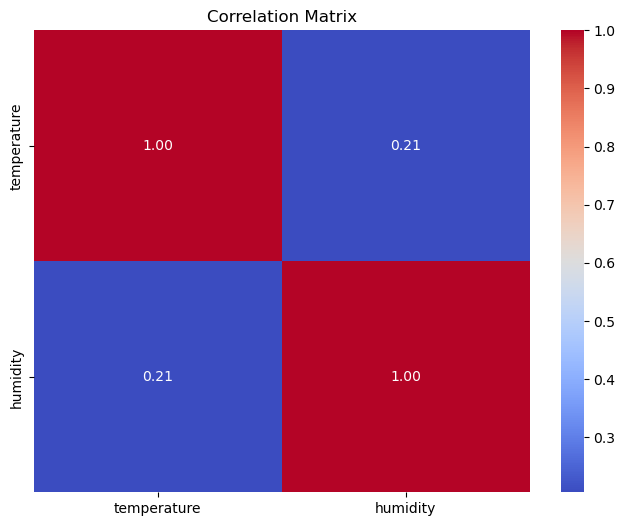

In [13]:
correlation_matrix = df[['temperature','humidity']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Density')

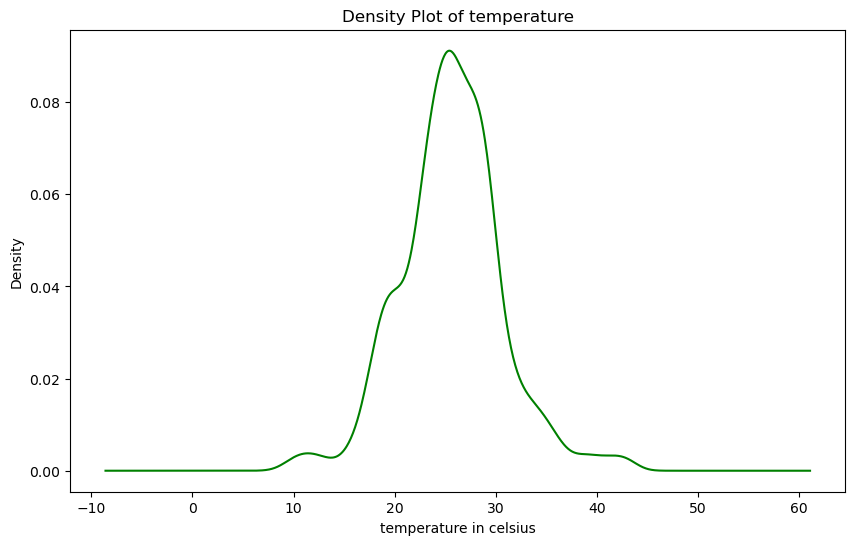

In [14]:
plt.figure(figsize=(10, 6))
df.temperature.plot.density(color='green')
plt.title('Density Plot of temperature')
plt.xlabel('temperature in celsius')
plt.ylabel('Density')

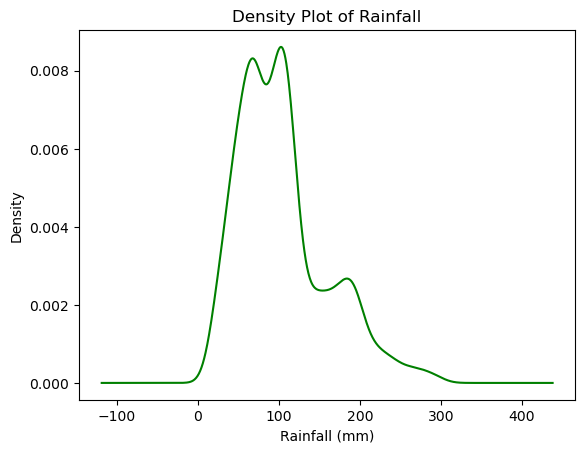

In [15]:

df.rainfall.plot.density(color='green') 

plt.title('Density Plot of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Density')
plt.show()

In [16]:
df.value_counts('label')

label
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
Name: count, dtype: int64

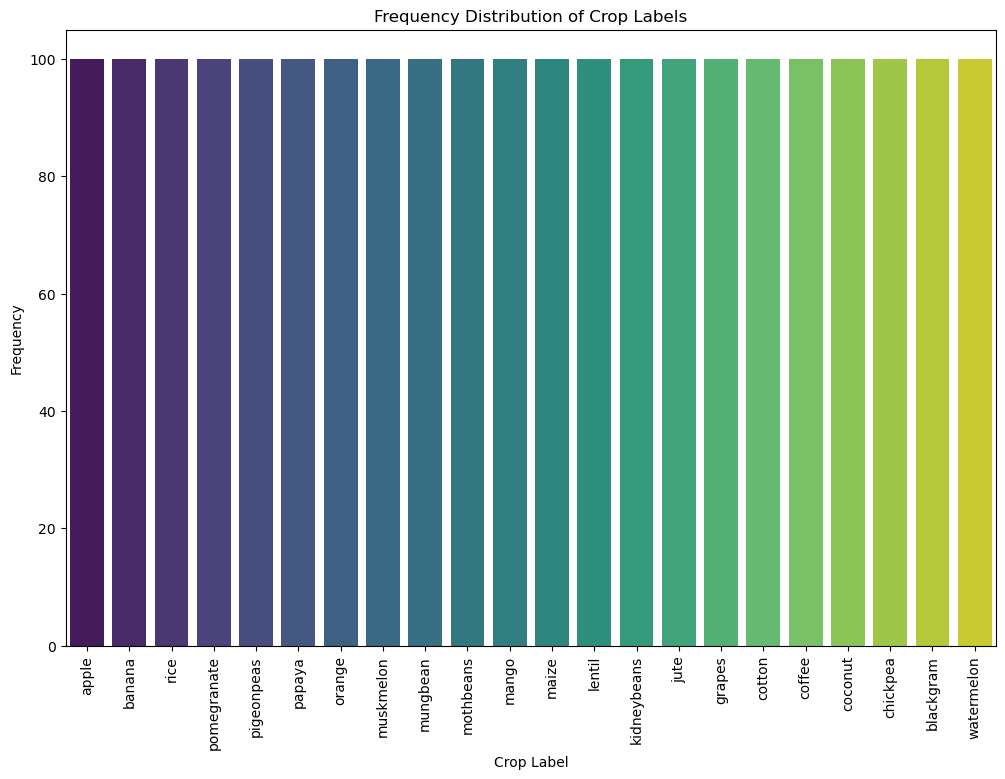

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df.value_counts('label').index, y=df.value_counts('label').values, palette="viridis")
plt.title('Frequency Distribution of Crop Labels')
plt.xlabel('Crop Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


C:\Users\balaj\AppData\Local\Temp\ipykernel_20216\3417777947.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='label', y='temperature', data=df, palette="viridis", jitter=True, dodge=True, alpha=0.7)


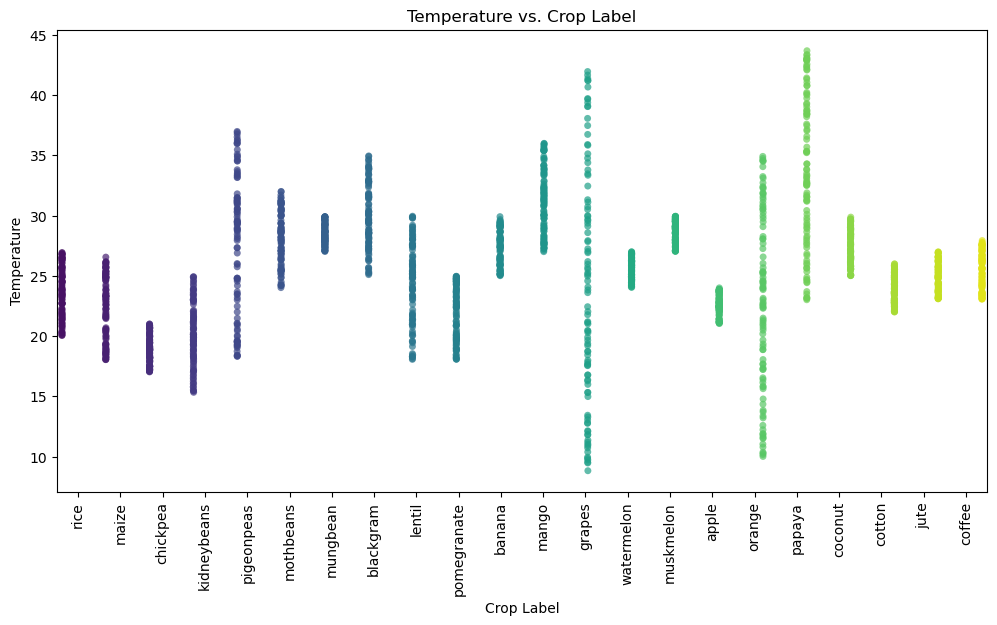

In [18]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='label', y='temperature', data=df, palette="viridis", jitter=True, dodge=True, alpha=0.7)
plt.title('Temperature vs. Crop Label')
plt.xlabel('Crop Label')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.show()


C:\Users\balaj\AppData\Local\Temp\ipykernel_20216\2263913942.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='label', y='rainfall', data=df, palette="viridis", jitter=True, dodge=True, alpha=0.7)


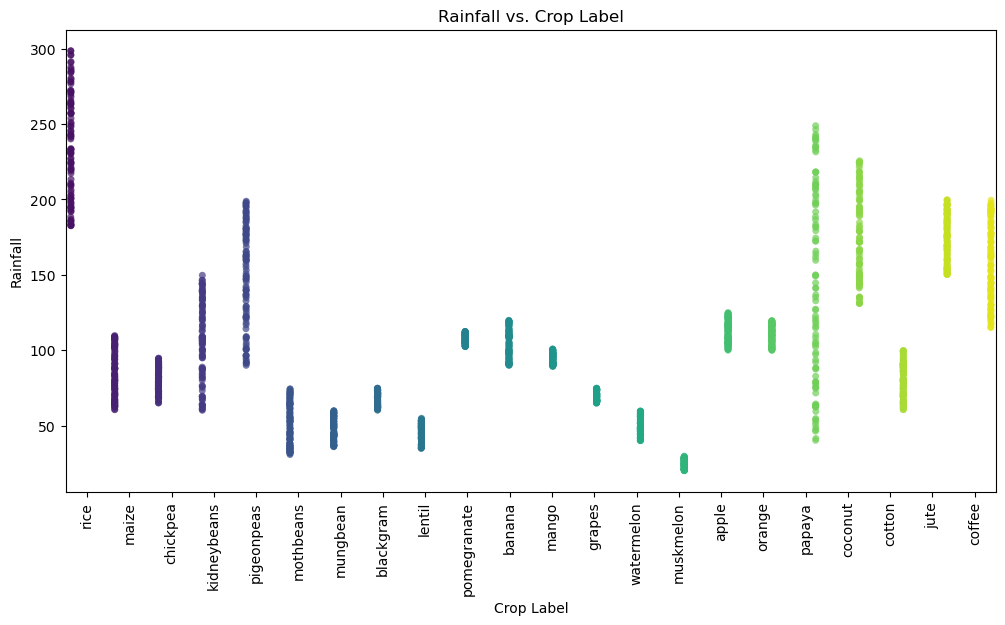

In [19]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='label', y='rainfall', data=df, palette="viridis", jitter=True, dodge=True, alpha=0.7)
plt.title('Rainfall vs. Crop Label')
plt.xlabel('Crop Label')
plt.ylabel('Rainfall')
plt.xticks(rotation=90)
plt.show()


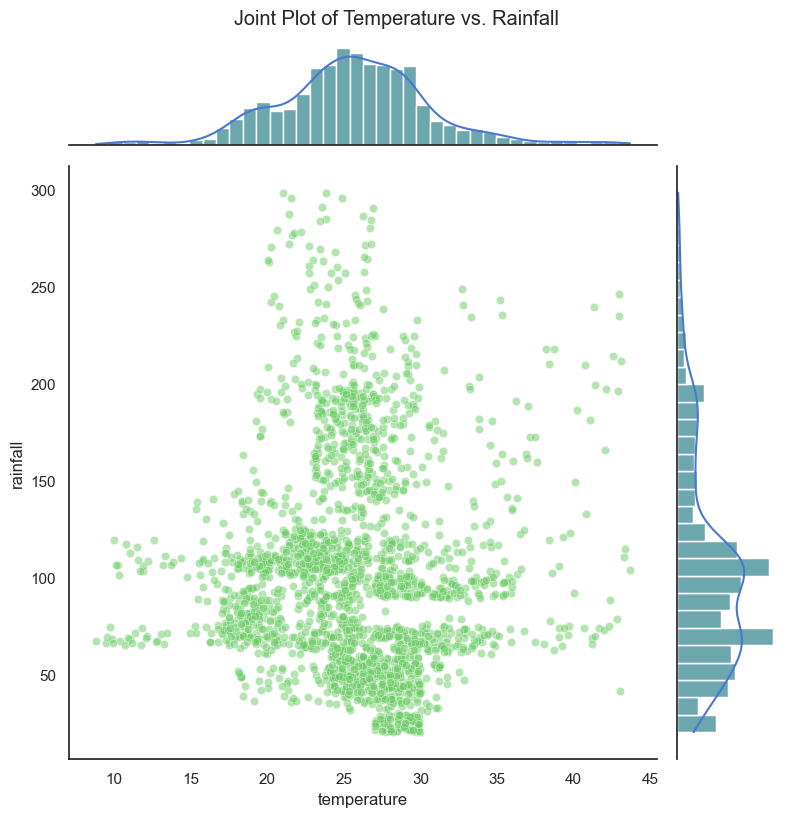

In [20]:
sns.set(style="white", palette="muted")

# Create the joint plot
joint_plot = sns.jointplot(
    x="temperature", y="rainfall", data=df, kind="scatter", color="g", alpha=0.5, height=8
)

joint_plot.plot_marginals(sns.histplot, kde=True)
joint_plot.fig.suptitle('Joint Plot of Temperature vs. Rainfall', y=1.02)

plt.show()


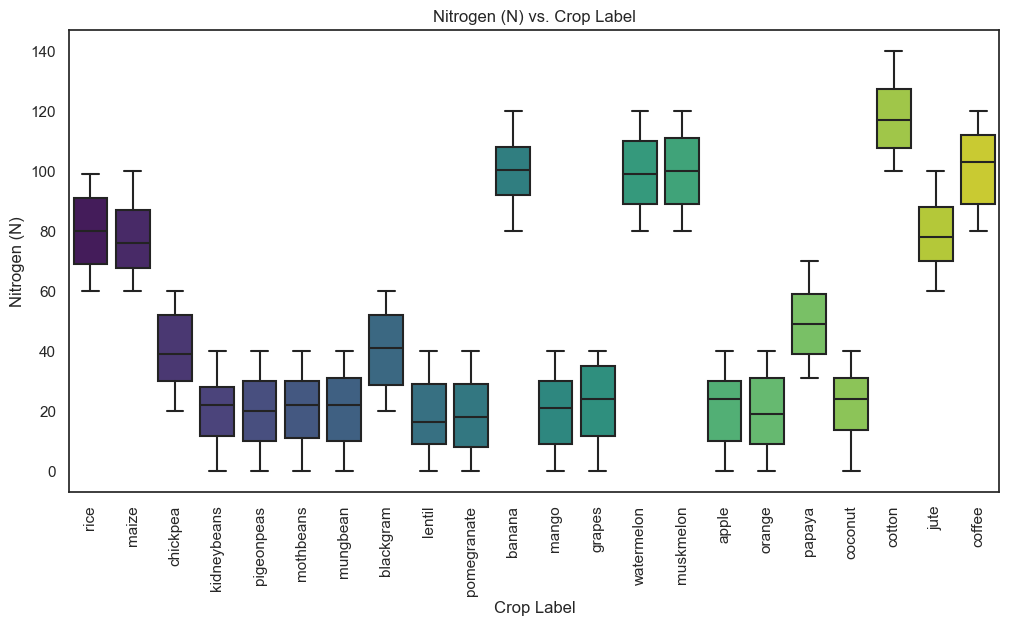

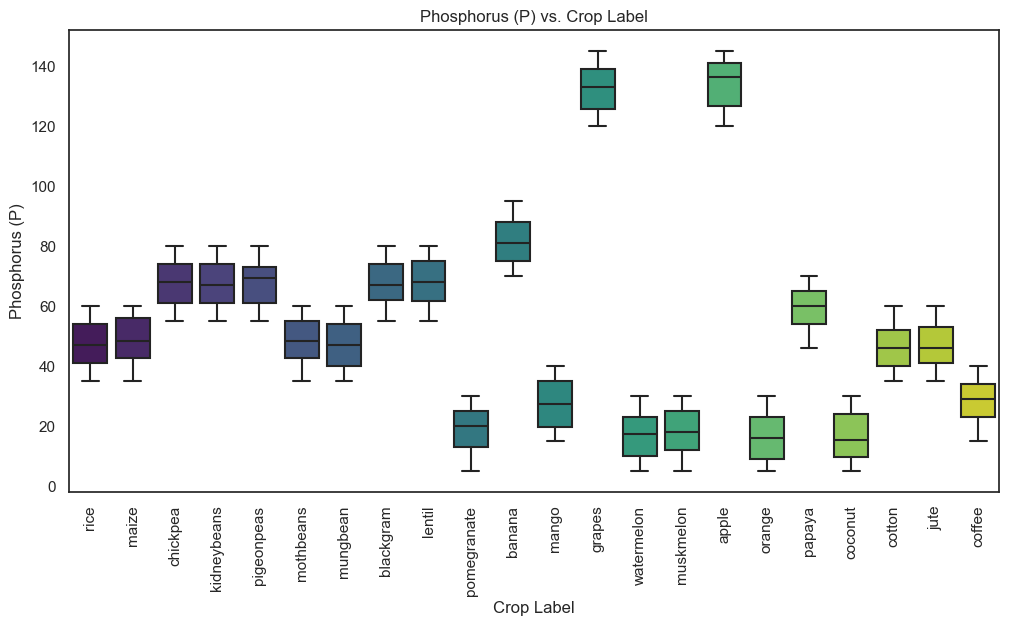

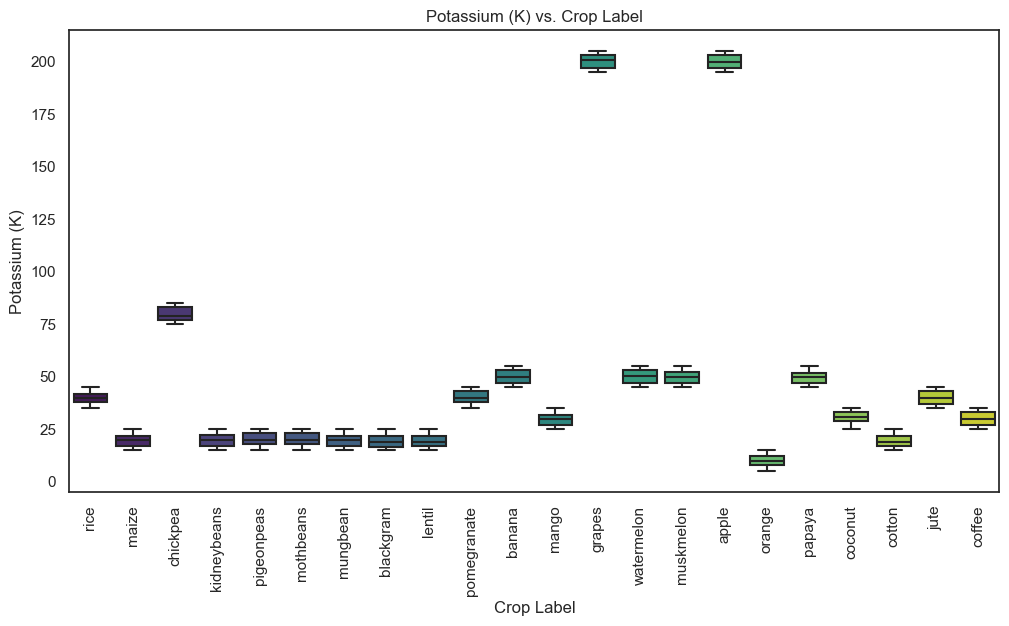

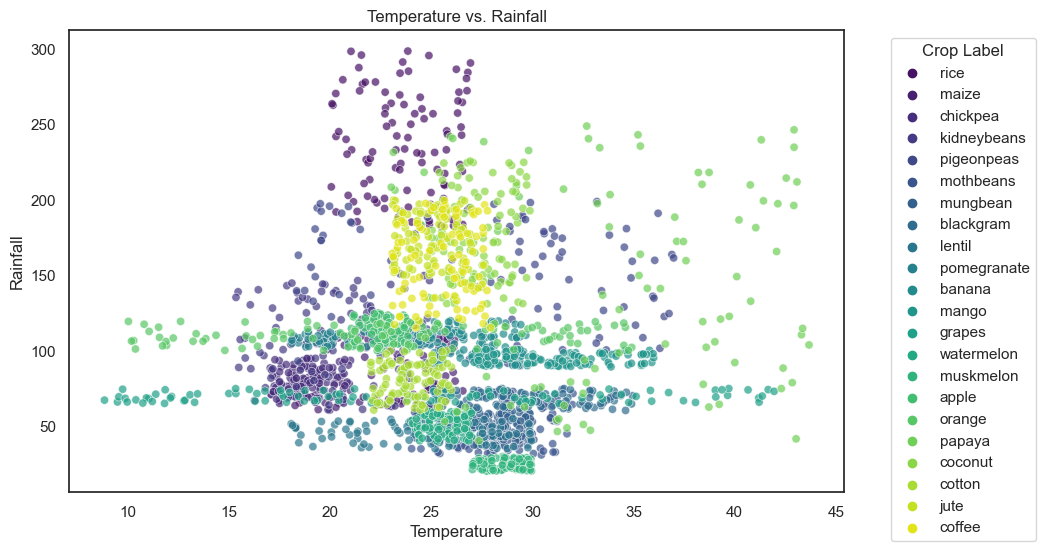

In [21]:




# N vs. Crop Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='N', data=df, palette="viridis")
plt.title('Nitrogen (N) vs. Crop Label')
plt.xlabel('Crop Label')
plt.ylabel('Nitrogen (N)')
plt.xticks(rotation=90)
plt.show()

# P vs. Crop Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='P', data=df, palette="viridis")
plt.title('Phosphorus (P) vs. Crop Label')
plt.xlabel('Crop Label')
plt.ylabel('Phosphorus (P)')
plt.xticks(rotation=90)
plt.show()

# K vs. Crop Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='K', data=df, palette="viridis")
plt.title('Potassium (K) vs. Crop Label')
plt.xlabel('Crop Label')
plt.ylabel('Potassium (K)')
plt.xticks(rotation=90)
plt.show()

# Temperature vs. Rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='rainfall', hue='label', data=df, palette="viridis", alpha=0.7)
plt.title('Temperature vs. Rainfall')
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.legend(title='Crop Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

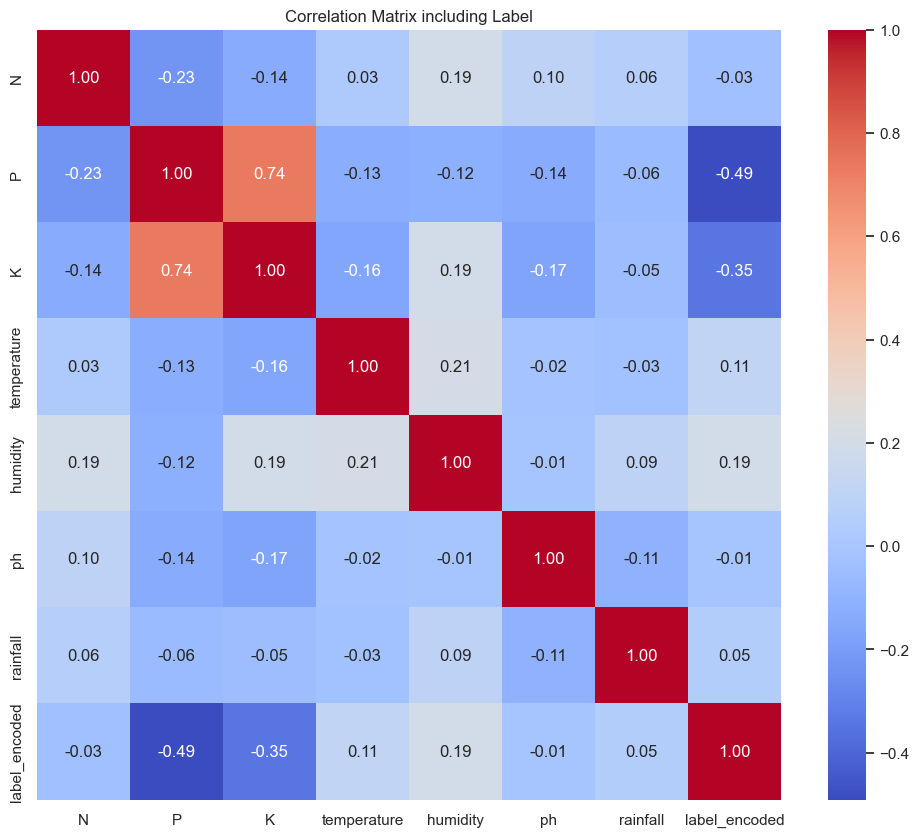

In [22]:

from sklearn.preprocessing import LabelEncoder# Encode the 'label' column
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Select only the numeric columns, including the newly encoded label column
numeric_data = df.select_dtypes(include=[int, float])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix including Label')
plt.show()

In [23]:

high_phosphorus_threshold = 100
# df['P'].quantile(0.95)

# Filter crops with high phosphorus levels
high_phosphorus_crops = df[df['P'] >= high_phosphorus_threshold]

# Display the crops with high phosphorus levels
print(high_phosphorus_crops[['label', 'P']].sort_values(by='P', ascending=False))


       label    P
1284  grapes  145
1588   apple  145
1568   apple  145
1220  grapes  145
1594   apple  145
...      ...  ...
1289  grapes  120
1595   apple  120
1567   apple  120
1271  grapes  120
1280  grapes  120

[200 rows x 2 columns]


In [24]:
high_N_threshold = 120
# df['P'].quantile(0.95)

# Filter crops with high phosphorus levels
high_N_crops = df[df['N'] >= high_N_threshold]

# Display the crops with high phosphorus levels
print(high_N_crops[['label', 'N']].sort_values(by='N', ascending=False))

           label    N
1978      cotton  140
1950      cotton  140
1912      cotton  140
1928      cotton  139
1974      cotton  136
1901      cotton  136
1916      cotton  135
1975      cotton  134
1967      cotton  134
1903      cotton  133
1956      cotton  133
1943      cotton  133
1900      cotton  133
1941      cotton  132
1970      cotton  132
1927      cotton  131
1946      cotton  131
1934      cotton  131
1960      cotton  131
1915      cotton  131
1991      cotton  131
1965      cotton  130
1957      cotton  129
1985      cotton  129
1909      cotton  129
1944      cotton  127
1966      cotton  127
1979      cotton  126
1988      cotton  126
1905      cotton  126
1904      cotton  126
1924      cotton  125
1932      cotton  125
1952      cotton  123
1918      cotton  123
1962      cotton  123
1948      cotton  122
1911      cotton  122
1939      cotton  122
1981      cotton  121
1920      cotton  121
1908      cotton  121
1907      cotton  121
1989      cotton  120
1999      

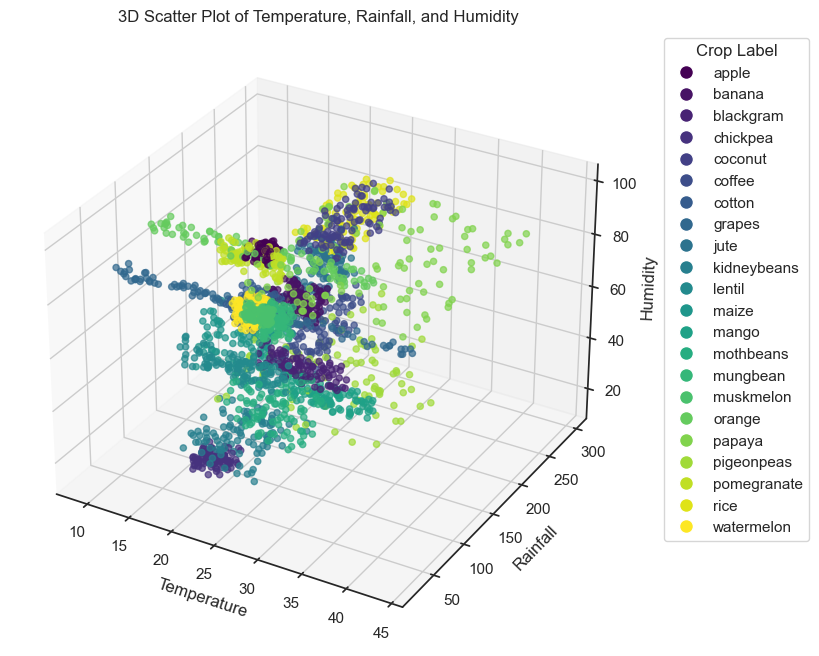

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

 
# Define the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(df['temperature'], df['rainfall'], df['humidity'], c=df['label'].astype('category').cat.codes, cmap='viridis', alpha=0.7)

# Add labels
ax.set_title('3D Scatter Plot of Temperature, Rainfall, and Humidity')
ax.set_xlabel('Temperature')
ax.set_ylabel('Rainfall')
ax.set_zlabel('Humidity')

# Create a legend
labels = df['label'].astype('category').cat.categories
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sc.cmap(sc.norm(i)), markersize=10) for i in range(len(labels))]
ax.legend(handles, labels, title='Crop Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [83]:
import pandas as pd
import plotly.express as px


# 3D plot using Plotly
fig = px.scatter_3d(df, x='temperature', y='rainfall', z='humidity', color='label',
                    title="Crop Types: Temperature vs Rainfall vs Humidity", labels={'label': 'Crop Type'})

# Update layout with titles for axes
fig.update_layout(scene=dict(
    xaxis_title='Temperature C',
    yaxis_title='Rainfall mm',
    zaxis_title='Humidity %'
))

# Adjust the view for better visualization
fig.update_layout(scene_camera=dict(
    eye=dict(x=1.5, y=1.5, z=1.5)
))

# Show the plot
fig.show()


- done
- rice, papaya has wide rainfall conditions.

- Mango could thrive in warm temperatures with high rainfall and humidity.
- kidneybeans and chickpeas grows in less humid areas

In [84]:

# 3D plot using Plotly
fig = px.scatter_3d(df, x='N', y='P', z='K', color='label',
                    title="Crop Types: Nitrogen vs Phosphorus vs Potassium", labels={'label': 'Crop Type'})

# Update layout with titles for axes
fig.update_layout(scene=dict(
    xaxis_title='Nitrogen (N) ppm',
    yaxis_title='Phosphorus (P) ppm',
    zaxis_title='Potassium (K) ppm'
))

# Adjust the view for better visualization
fig.update_layout(scene_camera=dict(
    eye=dict(x=1.5, y=1.5, z=1.5)
))

# Show the plot
fig.show()


- done
- grapes, apples has less N, and greater P and K.
- muskmelon and watermelon require same conditions
- beans and peas can be grouped as same.
- some fruits as orange, pomegrantes has less phosphorous, K and N.


In [85]:
fig = px.scatter(df, x='ph', y='temperature', color='label',
                 title="Crop Types: pH vs Temperature", labels={'label': 'Crop Type'})

# Update layout with titles for axes
fig.update_layout(
    xaxis_title='pH',
    yaxis_title='Temperature C'
)

# Show the plot
fig.show()

- mothbeans has wide ph range.
- grapes has high temp range

In [86]:
fig = px.scatter_3d(df, x='N', y='temperature', z='humidity', color='label',
                    title="Crop Types: Nitrogen vs Temperature vs Humidity", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Nitrogen (N) ppm',
    yaxis_title='Temperature C',
    zaxis_title='Humidity %'
))

fig.show()


- done
- coffee and maize can be grouped as one.
- Rice ,jute might require higher nitrogen in warmer temperatures and humid conditions.
- Coconut could show a preference for higher humidity levels with moderate nitrogen needs.


In [87]:
fig = px.scatter_3d(df, x='N', y='ph', z='rainfall', color='label',
                    title="Crop Types: Nitrogen vs pH vs Rainfall", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Nitrogen (N) ppm',
    yaxis_title='pH',
    zaxis_title='Rainfall mm'
))

fig.show()


- done
- Maize and Wheat could be categorized by their pH and rainfall preferences, thriving in moderate pH and rainfall conditions.
- rice has wide range of rainfall and ph conditions.
- mothbeans has wide ph but low N, rainfall levels
- Lentil and Kidney Beans might require higher nitrogen in slightly acidic soils.



In [88]:
fig = px.scatter_3d(df, x='P', y='K', z='temperature', color='label',
                    title="Crop Types: Phosphorus vs Potassium vs Temperature", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Phosphorus (P) ppm',
    yaxis_title='Potassium (K) ppm',
    zaxis_title='Temperature C'
))

fig.show()


- done
- apples and grapes are similar but apples grow at specific temp.
- most beans, lentils has low K, P.
- Mango and Papaya might group by temperature ranges with specific phosphorus and potassium needs, thriving in warmer climates.

- Cotton could show high potassium and phosphorus demands in moderate temperatures.


In [89]:
fig = px.scatter_3d(df, x='P', y='humidity', z='rainfall', color='label',
                    title="Crop Types: Phosphorus vs Humidity vs Rainfall", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Phosphorus (P) ppm',
    yaxis_title='Humidity %',
    zaxis_title='Rainfall mm'
))

fig.show()


- done
- we can see only pomegrante and orange can be clustered here and they low ranges in this graph.
- Kidney Beans and Lentil might show high phosphorus needs with moderate rainfall.
- Mango could prefer high humidity with moderate phosphorus levels.


In [90]:
fig = px.scatter_3d(df, x='K', y='ph', z='rainfall', color='label',
                    title="Crop Types: Potassium vs pH vs Rainfall", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Potassium (K) ppm',
    yaxis_title='pH',
    zaxis_title='Rainfall mm'
))

fig.show()


- done
- Maize and Rice might group by their potassium needs in specific pH ranges and rainfall patterns, preferring slightly acidic to neutral pH with high rainfall.
- Chickpea and Kidney Beans could prefer moderate rainfall with specific potassium needs.
- Mango might thrive in higher potassium conditions with specific pH and rainfall.


In [91]:
fig = px.scatter_3d(df, x='K', y='temperature', z='humidity', color='label',
                    title="Crop Types: Potassium vs Temperature vs Humidity", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Potassium (K) ppm',
    yaxis_title='Temperature C',
    zaxis_title='Humidity %'
))

fig.show()


- done
- orange and papaya has high humid, less Kbut  wide temp ranges.
- Banana and Coconut might group by their potassium needs across different temperature and humidity levels, preferring warm and humid conditions.
- maize and lentils can be grouped as one.



In [92]:
fig = px.scatter_3d(df, x='temperature', y='humidity', z='ph', color='label',
                    title="Crop Types: Temperature vs Humidity vs pH", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Temperature C',
    yaxis_title='Humidity %',
    zaxis_title='pH'
))

fig.show()


- done
- Coconut and Rice could cluster in specific temperature and humidity ranges, with a preference for neutral to slightly acidic pH.
- mothbeans and pegionbeans are spread a lot.
- Banana might thrive in warmer, more humid conditions with moderate pH levels.


In [93]:
fig = px.scatter_3d(df, x='temperature', y='rainfall', z='ph', color='label',
                    title="Crop Types: Temperature vs rainfall vs pH", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Temperature C',
    yaxis_title='rainfall mm',
    zaxis_title='pH'
))

fig.show()


- 

In [94]:
fig = px.scatter_3d(df, x='temperature', y='N', z='P', color='label',
                    title="Crop Types: Temperature vs Nitrogen vs Phosphorus", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Temperature C',
    yaxis_title='Nitrogen (N) ppm',
    zaxis_title='Phosphorus (P) ppm'
))

fig.show()


- done.
- Maize and Rice could cluster based on their nitrogen and phosphorus needs across different temperature ranges.
- most beans require low temperature but wide phosporous ranges.
- Banana could show high nitrogen and phosphorus demands in warmer temperatures.


In [95]:
fig = px.scatter_3d(df, x='temperature', y='K', z='P', color='label',
                    title="Crop Types: Temperature vs Potassium vs Phosphorus", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Temperature C',
    yaxis_title='Potassium (K) ppm',
    zaxis_title='Phosphorus (P) ppm'
))

fig.show()


- done.
- Mango and Papaya might group by their potassium and phosphorus needs at different temperatures, thriving in warmer climates.
- Cotton could show high potassium and phosphorus demands in moderate temperatures.


In [39]:
fig = px.scatter_3d(df, x='humidity', y='K', z='P', color='label',
                    title="Crop Types: Humidity vs Potassium vs Phosphorus", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Humidity %',
    yaxis_title='Potassium (K) ppm',
    zaxis_title='Phosphorus (P) ppm'
))

fig.show()


- done.
- we can see most of them has the less potassium range.
- Kidney Beans and Lentil might show moderate potassium and phosphorus needs with specific humidity levels.
- Mango could prefer high humidity with specific phosphorus and potassium requirements.


In [40]:
fig = px.scatter_3d(df, x='humidity', y='temperature', z='N', color='label',
                    title="Crop Types: Humidity vs Temperature vs Nitrogen", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Humidity %',
    yaxis_title='Temperature C',
    zaxis_title='Nitrogen (N) ppm'
))

fig.show()


- only pigeonpeas and mothbeans has more humidity ranges.
- Coconut could show a preference for high humidity and moderate nitrogen needs.

In [96]:
fig = px.scatter_3d(df, x='humidity', y='ph', z='rainfall', color='label',
                    title="Crop Types: Humidity vs pH vs Rainfall", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Humidity %',
    yaxis_title='pH',
    zaxis_title='Rainfall mm'
))

fig.show()


- mungbean and orange grows in a very limited raneg of rainfall.
- Mango could thrive in high humidity with specific pH and moderate rainfall.


In [42]:
fig = px.scatter_3d(df, x='rainfall', y='temperature', z='K', color='label',
                    title="Crop Types: Rainfall vs Temperature vs Potassium", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Rainfall mm',
    yaxis_title='Temperature C',
    zaxis_title='Potassium (K) ppm'
))

fig.show()


- done.
- Banana might show high potassium needs in warm and high-rainfall conditions.

In [43]:
fig = px.scatter_3d(df, x='rainfall', y='N', z='P', color='label',
                    title="Crop Types: Rainfall vs Nitrogen vs Phosphorus", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Rainfall mm',
    yaxis_title='Nitrogen (N) ppm',
    zaxis_title='Phosphorus (P) ppm'
))

fig.show()


- done.
- we can see that muskmelon, watermelon has low N, P, rainfall.

In [44]:
fig = px.scatter_3d(df, x='rainfall', y='humidity', z='K', color='label',
                    title="Crop Types: Rainfall vs Humidity vs Potassium", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='Rainfall mm',
    yaxis_title='Humidity %',
    zaxis_title='Potassium (K) ppm'
))

fig.show()


In [45]:
fig = px.scatter_3d(df, x='ph', y='K', z='temperature', color='label',
                    title="Crop Types: pH vs Potassium vs Temperature", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='pH',
    yaxis_title='Potassium (K) ppm',
    zaxis_title='Temperature C'
))

fig.show()


- done.
- Mango and Papaya might group by their potassium needs across different pH and temperature conditions, thriving in warmer climates.

- Cotton could show high potassium demands in moderate temperatures with specific pH.


In [97]:
fig = px.scatter_3d(df, x='ph', y='temperature', z='rainfall', color='label',
                    title="Crop Types: pH vs Temperature vs Rainfall", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='pH',
    yaxis_title='Temperature C',
    zaxis_title='Rainfall mm'
))

fig.show()


In [47]:
fig = px.scatter_3d(df, x='ph', y='N', z='rainfall', color='label',
                    title="Crop Types: pH vs Nitrogen vs Rainfall", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='pH',
    yaxis_title='Nitrogen (N) ppm',
    zaxis_title='Rainfall mm'
))

fig.show()


- done.
- most of them has moderate ph but wide rainfall ranges.

In [98]:
fig = px.scatter_3d(df, x='ph', y='humidity', z='K', color='label',
                    title="Crop Types: pH vs Humidity vs Potassium", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='pH',
    yaxis_title='Humidity %',
    zaxis_title='Potassium (K)ppm'
))

fig.show()


- done
- fruits has high humidity than beans.
- chickpeas has high potassium.

In [99]:
fig = px.scatter_3d(df, x='ph', y='temperature', z='humidity', color='label',
                    title="Crop Types: pH vs Temperature vs Humidity", labels={'label': 'Crop Type'})

fig.update_layout(scene=dict(
    xaxis_title='pH',
    yaxis_title='Temperature C',
    zaxis_title='Humidity %'
))

fig.show()


- done
- Mango could thrive in warm temperatures with high humidity and specific pH levels.
- kidneybeans could thrive in low temperatures with less humidity and specific pH levels.
- chickpeas are also similar but wide ph values.



### Key Insights to Expect from These Plots

1. **Nutrient Balance**: The N-P-K plot will help identify the optimal nutrient balance for different crops. Crops with similar nutrient requirements will cluster together.
2. **Environmental Suitability**: The Temperature-Humidity-pH and Temperature-Rainfall-pH plots will reveal which crops are best suited for particular environmental conditions.
3. **Climate Adaptation**: The Rainfall-Humidity-Temperature plot will show how crops adapt to different climatic conditions, helping in planning for climate-resilient agriculture.
4. **Soil and Climate Interaction**: The Nitrogen-Temperature-Humidity, Phosphorus-Potassium-Temperature, and pH-Nitrogen-Rainfall plots will provide insights into how soil properties interact with climate factors, crucial for understanding crop-specific requirements.
5. **Optimal Growth Conditions**: The pH-Temperature-Humidity plot will highlight the ideal soil and climate conditions for various crops, aiding in precision agriculture practices.


In [50]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the data
df = pd.read_csv('Crop_recommendation.csv')

# Select features and target variable
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with increased iterations
model = LogisticRegression(max_iter=2000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)

# Print the classification report for precision, recall, and F1-score
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9636363636363636
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0

In [51]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy: ", np.std(cv_scores))

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\balaj\anaconda3\Lib\site-packages

Cross-Validation Accuracy Scores:  [0.97272727 0.97954545 0.98636364 0.98409091 0.98409091]
Mean Cross-Validation Accuracy:  0.9813636363636364
Standard Deviation of Cross-Validation Accuracy:  0.004853217387286948


C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [52]:
from sklearn.ensemble import RandomForestClassifier
# Split the data into training (50%) and temporary (50%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.5, random_state=42)

# Split the temporary set into validation (30% of original) and testing (20% of original) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = rf_model.predict(X_val)

# Calculate the accuracy of the model on validation data
val_accuracy = accuracy_score(y_val, y_val_pred)

# Calculate the confusion matrix on validation data
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Print the validation accuracy and confusion matrix
print('Validation Accuracy:', val_accuracy)
print('Validation Confusion Matrix:\n', val_conf_matrix)

# Print the classification report for precision, recall, and F1-score on validation data
print('Validation Classification Report:\n', classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

# Make predictions on the testing data
y_test_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate the confusion matrix on testing data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the testing accuracy and confusion matrix
print('Test Accuracy:', test_accuracy)
print('Test Confusion Matrix:\n', test_conf_matrix)

# Print the classification report for precision, recall, and F1-score on testing data
print('Test Classification Report:\n', classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Validation Accuracy: 0.9924242424242424
Validation Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  

In [53]:
# Predict a sample outcome
sample_values = np.array([[80, 40, 40, 20.0, 80.0, 7.0, 200.0]])  # Example values: N, P, K, temperature, humidity, pH, rainfall
sample_prediction = rf_model.predict(sample_values)
sample_prediction_label = df['label'].astype('category').cat.categories[sample_prediction[0]]

print(f'Predicted Crop for the sample values: {sample_prediction_label}')

Predicted Crop for the sample values: rice


C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [54]:
# Predict a sample outcome
sample_values = np.array([[100, 80, 20, 30.0, 20.0, 10.0, 250.0]])  # Example values: N, P, K, temperature, humidity, pH, rainfall
sample_prediction = rf_model.predict(sample_values)
sample_prediction_label = df['label'].astype('category').cat.categories[sample_prediction[0]]

print(f'Predicted Crop for the sample values: {sample_prediction_label}')

Predicted Crop for the sample values: coffee


C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [55]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy: ", np.std(cv_scores))

Cross-Validation Accuracy Scores:  [0.99772727 0.99318182 0.99772727 0.99545455 0.98863636]
Mean Cross-Validation Accuracy:  0.9945454545454545
Standard Deviation of Cross-Validation Accuracy:  0.003401506715249021


C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.

C:\Users\b

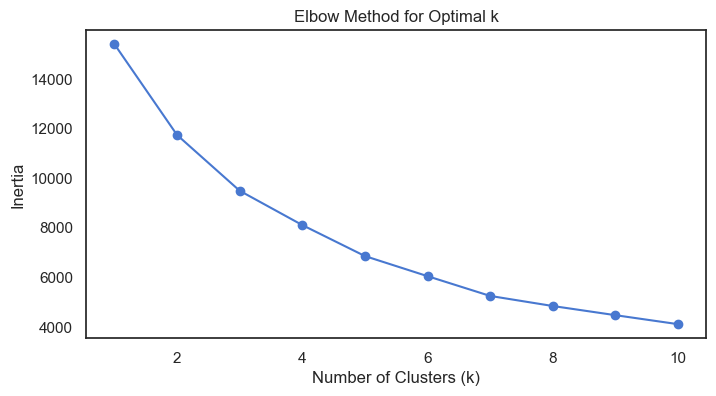

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Preprocess the data
features = df.drop(columns=['label'])  # Drop the 'label' column for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Apply the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   Cluster_Optimal  Cluster_Arbitrary  
0                1                  2  
1                1                  2  
2                1                  2  
3                1                  2  
4                1                  2  


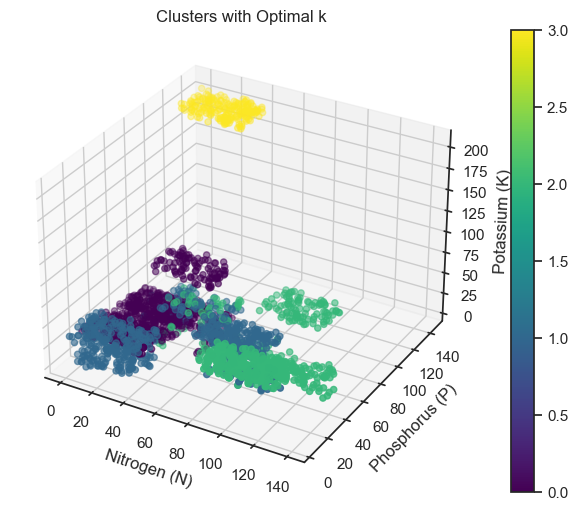

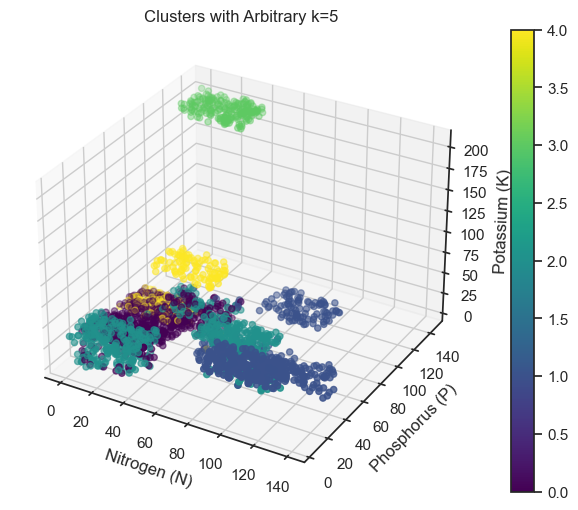

In [57]:
optimal_k = 4  # Assuming the elbow point is at k=4

# Apply K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_Optimal'] = kmeans_optimal.fit_predict(scaled_features)

# Apply K-Means with an arbitrary number of clusters (e.g., k=5)
kmeans_arbitrary = KMeans(n_clusters=5, random_state=42)
df['Cluster_Arbitrary'] = kmeans_arbitrary.fit_predict(scaled_features)

# Display the first few rows of the dataframe with cluster assignments
print(df.head())

# Optional: Visualize the clusters in a 3D plot for selected features
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['N'], df['P'], df['K'], c=df['Cluster_Optimal'], cmap='viridis')
ax.set_xlabel('Nitrogen (N)')
ax.set_ylabel('Phosphorus (P)')
ax.set_zlabel('Potassium (K)')
plt.colorbar(sc)
plt.title('Clusters with Optimal k')
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['N'], df['P'], df['K'], c=df['Cluster_Arbitrary'], cmap='viridis')
ax.set_xlabel('Nitrogen (N)')
ax.set_ylabel('Phosphorus (P)')
ax.set_zlabel('Potassium (K)')
plt.colorbar(sc)
plt.title('Clusters with Arbitrary k=5')
plt.show()

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


# Select features and target variable
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9863636363636363
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17


In [59]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy: ", np.std(cv_scores))

Cross-Validation Accuracy Scores:  [0.98409091 0.98409091 0.99090909 0.99090909 0.98409091]
Mean Cross-Validation Accuracy:  0.9868181818181819
Standard Deviation of Cross-Validation Accuracy:  0.003340213285613433


In [60]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9818181818181818
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.82      1.00      0.90        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00   

In [61]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy: ", np.std(cv_scores))

Cross-Validation Accuracy Scores:  [0.99090909 0.98863636 0.99318182 0.99545455 0.98636364]
Mean Cross-Validation Accuracy:  0.990909090909091
Standard Deviation of Cross-Validation Accuracy:  0.0032141217326661377


In [62]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.9568181818181818
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00        14
           8       0.81      0.96      0.88        23
           9       0.91      1.00      0.95        20
          10       0.69      1.00      0.81        11
          11       1.00      0.90      0.95        21
          12       0.90      1.00      0.95        19
          13       1.00      0.83      0.91        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1

In [63]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy: ", np.std(cv_scores))

Cross-Validation Accuracy Scores:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]
Mean Cross-Validation Accuracy:  0.9795454545454545
Standard Deviation of Cross-Validation Accuracy:  0.001437398936440164


In [64]:
from sklearn.svm import SVC
# Initialize the Support Vector Machine Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)

# Print the classification report for precision, recall, and F1-score
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.9772727272727273
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0

In [65]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy: ", np.std(cv_scores))

Cross-Validation Accuracy Scores:  [0.98181818 0.98863636 0.98863636 0.98181818 0.98409091]
Mean Cross-Validation Accuracy:  0.985
Standard Deviation of Cross-Validation Accuracy:  0.003082877265056945


In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Initialize the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lda_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)

# Print the classification report for precision, recall, and F1-score
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9431818181818182
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  2 20  0  0  0  0

In [67]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lda_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy: ", np.std(cv_scores))

Cross-Validation Accuracy Scores:  [0.96363636 0.95454545 0.97272727 0.97272727 0.96136364]
Mean Cross-Validation Accuracy:  0.9650000000000001
Standard Deviation of Cross-Validation Accuracy:  0.006982859770789658


In [68]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)

# Print the classification report for precision, recall, and F1-score
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9954545454545455
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0

In [69]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy: ", np.std(cv_scores))

Cross-Validation Accuracy Scores:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Mean Cross-Validation Accuracy:  0.9950000000000001
Standard Deviation of Cross-Validation Accuracy:  0.00222680885707559


In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Select features and target variable
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans model to cluster into 5 groups
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model on the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels for each sample
cluster_labels = kmeans.labels_

# Create a DataFrame to display the grouping
df['Cluster'] = cluster_labels

# Ensure each crop is unique in the groups
unique_crops = df.drop_duplicates(subset=['label'])
unique_clusters = unique_crops.groupby('Cluster')['label'].apply(list)

# Convert to dictionary format for easy access
groups = {f"Group {i+1}": crops for i, crops in enumerate(unique_clusters)}

# Print the groups
for group, crops in groups.items():
    print(f'{group}: {crops}')


C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



Group 1: ['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'mango']
Group 2: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
Group 3: ['rice', 'pomegranate', 'orange', 'papaya', 'coconut', 'jute', 'coffee']
Group 4: ['grapes', 'apple']
Group 5: ['chickpea', 'kidneybeans']




### Group 1: ['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'mango']

1. **Nitrogen (N)**:
   - Moderate to high nitrogen requirements (40-80 kg/ha).
2. **Phosphorus (P)**:
   - Moderate phosphorus requirements (20-40 kg/ha).
3. **Potassium (K)**:
   - Moderate potassium requirements (20-40 kg/ha).
4. **Temperature**:
   - Optimal range: 20-35°C.
5. **Humidity**:
   - Moderate to high humidity (50-80%).
6. **pH**:
   - Slightly acidic to neutral pH (6.0-7.5).
7. **Rainfall**:
   - Moderate to high rainfall (500-1000 mm annually).

### Group 2: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']

1. **Nitrogen (N)**:
   - High nitrogen requirements (80-120 kg/ha for maize and cotton).
2. **Phosphorus (P)**:
   - Moderate to high phosphorus requirements (40-80 kg/ha).
3. **Potassium (K)**:
   - High potassium requirements (60-120 kg/ha for fruits).
4. **Temperature**:
   - Optimal range: 25-35°C.
5. **Humidity**:
   - Moderate to high humidity (50-80%).
6. **pH**:
   - Slightly acidic to neutral pH (5.5-7.5).
7. **Rainfall**:
   - High water requirements (800-1500 mm annually).

### Group 3: ['rice', 'pomegranate', 'orange', 'papaya', 'coconut', 'jute', 'coffee']

1. **Nitrogen (N)**:
   - Moderate to high nitrogen requirements (60-100 kg/ha for rice and coffee).
2. **Phosphorus (P)**:
   - Moderate phosphorus requirements (30-50 kg/ha).
3. **Potassium (K)**:
   - High potassium requirements (60-100 kg/ha).
4. **Temperature**:
   - Optimal range: 20-30°C.
5. **Humidity**:
   - High humidity (70-90%).
6. **pH**:
   - Slightly acidic to neutral pH (5.5-6.5).
7. **Rainfall**:
   - High water requirements (1200-2000 mm annually for rice and jute).

### Group 4: ['grapes', 'apple']

1. **Nitrogen (N)**:
   - Moderate nitrogen requirements (40-60 kg/ha).
2. **Phosphorus (P)**:
   - Moderate phosphorus requirements (30-50 kg/ha).
3. **Potassium (K)**:
   - High potassium requirements (80-120 kg/ha for fruit development).
4. **Temperature**:
   - Optimal range: 15-25°C.
5. **Humidity**:
   - Moderate humidity (50-70%).
6. **pH**:
   - Slightly acidic to neutral pH (6.0-7.0).
7. **Rainfall**:
   - Moderate water requirements (500-800 mm annually, well-drained soils).

### Group 5: ['chickpea', 'kidneybeans']

1. **Nitrogen (N)**:
   - Moderate nitrogen requirements (20-40 kg/ha; legumes can fix atmospheric nitrogen).
2. **Phosphorus (P)**:
   - Moderate phosphorus requirements (20-40 kg/ha).
3. **Potassium (K)**:
   - Moderate potassium requirements (20-40 kg/ha).
4. **Temperature**:
   - Optimal range: 20-30°C.
5. **Humidity**:
   - Moderate to low humidity (40-60%).
6. **pH**:
   - Slightly acidic to neutral pH (6.0-7.5).
7. **Rainfall**:
   - Moderate water requirements (400-700 mm annually).

### Summary with Feature Ranges

- **Group 1**: Includes legumes and a fruit crop (mango) that prefer warm climates, moderate to high humidity, and moderate nutrient requirements. Ranges for features: N (40-80 kg/ha), P (20-40 kg/ha), K (20-40 kg/ha), temperature (20-35°C), humidity (50-80%), pH (6.0-7.5), rainfall (500-1000 mm).
  
- **Group 2**: Contains crops that thrive in warm to hot climates, with high nutrient requirements, especially potassium. Ranges for features: N (80-120 kg/ha), P (40-80 kg/ha), K (60-120 kg/ha), temperature (25-35°C), humidity (50-80%), pH (5.5-7.5), rainfall (800-1500 mm).
  
- **Group 3**: Features crops that need high humidity and rainfall, suitable for warm to hot climates. Ranges for features: N (60-100 kg/ha), P (30-50 kg/ha), K (60-100 kg/ha), temperature (20-30°C), humidity (70-90%), pH (5.5-6.5), rainfall (1200-2000 mm).
  
- **Group 4**: Contains fruit crops that prefer cooler climates and well-drained soils with moderate nutrient needs. Ranges for features: N (40-60 kg/ha), P (30-50 kg/ha), K (80-120 kg/ha), temperature (15-25°C), humidity (50-70%), pH (6.0-7.0), rainfall (500-800 mm).
  
- **Group 5**: Includes legumes that can fix nitrogen, preferring moderate climates and having moderate nutrient and water requirements. Ranges for features: N (20-40 kg/ha), P (20-40 kg/ha), K (20-40 kg/ha), temperature (20-30°C), humidity (40-60%), pH (6.0-7.5), rainfall (400-700 mm).


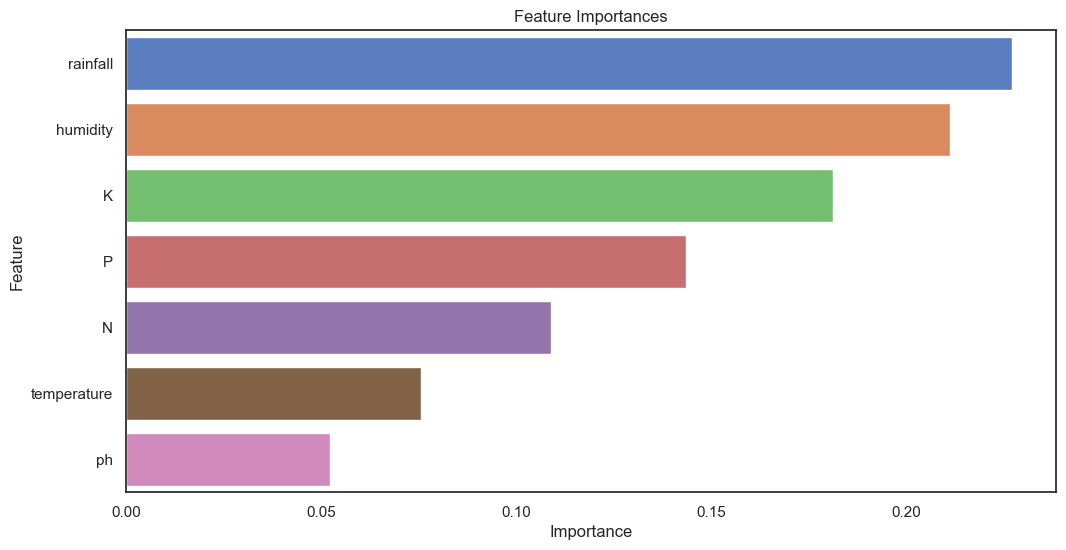

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.65      0.75      0.70        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      1.00      0.98        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       0.61      0.67      0.64        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.86      0.75      0.80        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

In [71]:
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Select important features (arbitrary threshold, e.g., importance > 0.05)
important_features = feature_importances[feature_importances['Importance'] > 0.15]['Feature']
X_important = X[important_features]

# Split the data using only important features
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Retrain the Random Forest model with important features
rf_imp = RandomForestClassifier(random_state=42)
rf_imp.fit(X_train_imp, y_train_imp)

# Evaluate the model
y_pred = rf_imp.predict(X_test_imp)
print("Classification Report:")
print(classification_report(y_test_imp, y_pred))
print("Accuracy:", accuracy_score(y_test_imp, y_pred))

# Cross-validation with 5 folds
cv_scores = cross_val_score(rf_imp, X_important, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

In [72]:
from sklearn.ensemble import RandomForestClassifier
# Split the data into training (50%) and temporary (50%) sets
# Load the data
df = pd.read_csv('Crop_recommendation.csv')

# Select features and target variable
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.5, random_state=42)

# Split the temporary set into validation (30% of original) and testing (20% of original) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)


sample_values = np.array([[80, 40, 40, 20.0, 80.0, 7.0, 200.0]])  # Example values: N, P, K, temperature, humidity, pH, rainfall

# Predict probabilities for all classes
sample_probabilities = rf_model.predict_proba(sample_values)

# Get the top 5 class indices with highest probabilities
top_5_indices = np.argsort(sample_probabilities[0])[::-1][:5]

# Get the corresponding crop names
top_5_crops = label_encoder.inverse_transform(top_5_indices)
top_5_probabilities = sample_probabilities[0][top_5_indices]

print('Top 5 suggested crops for the sample values:')
for crop, probability in zip(top_5_crops, top_5_probabilities):
    print(f'{crop}: {probability:.4f}')

Top 5 suggested crops for the sample values:
rice: 0.6700
jute: 0.3000
pigeonpeas: 0.0100
cotton: 0.0100
maize: 0.0100


C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Select features and target variable
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data into training (50%) and temporary (50%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.5, random_state=42)

# Split the temporary set into validation (30% of original) and testing (20% of original) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on the testing data
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Calculate the accuracy of the model on testing data
test_accuracy = accuracy_score(y_test_true_classes, y_test_pred_classes)

# Calculate the confusion matrix on testing data
test_conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)

# Print the testing accuracy and confusion matrix
print('Test Accuracy:', test_accuracy)
print('Test Confusion Matrix:\n', test_conf_matrix)

# Print the classification report for precision, recall, and F1-score on testing data
print('Test Classification Report:\n', classification_report(y_test_true_classes, y_test_pred_classes, target_names=label_encoder.classes_))





Epoch 1/50


35/35 [==============================] - 3s 18ms/step - loss: 3.1505 - accuracy: 0.0527 - val_loss: 2.9161 - val_accuracy: 0.1227
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.9568 - accuracy: 0.0964 - val_loss: 2.7574 - val_accuracy: 0.3712
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.8159 - accuracy: 0.1436 - val_loss: 2.5818 - val_accuracy: 0.4788
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.6388 - accuracy: 0.2018 - val_loss: 2.3606 - val_accuracy: 0.5197
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 2.4525 - accuracy: 0.2645 - val_loss: 2.1159 - val_accuracy: 0.6394
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 2.2951 - accuracy: 0.3100 - val_loss: 1.8774 - val_accuracy: 0.6697
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1276 - accuracy: 0.3364 - val_loss: 1.6564 - val_accuracy: 0.6879
Epoch 8/50
35/

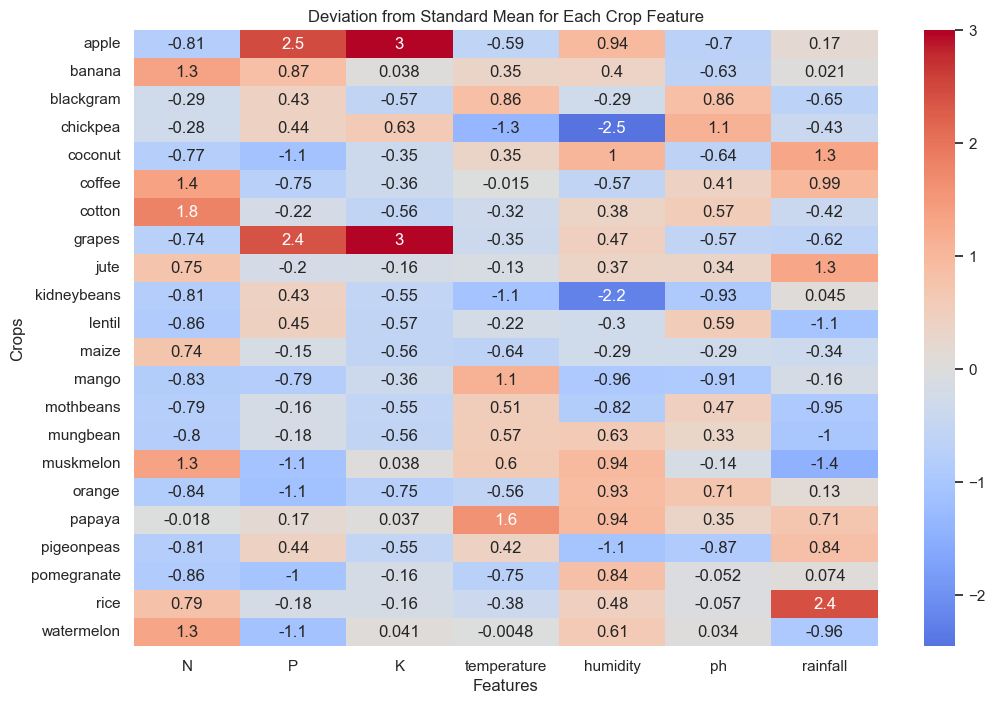

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')

# Features to analyze
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Calculate the standard mean and standard deviation for each feature
standard_means = df[features].mean()
standard_stds = df[features].std()

# Group by crop and calculate the mean for each feature
crop_means = df.groupby('label')[features].mean()

# Calculate the deviation from the standard mean for each feature
deviation_from_standard_mean = (crop_means - standard_means) / standard_stds

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(deviation_from_standard_mean, annot=True, cmap='coolwarm', center=0)
plt.title('Deviation from Standard Mean for Each Crop Feature')
plt.xlabel('Features')
plt.ylabel('Crops')
plt.show()


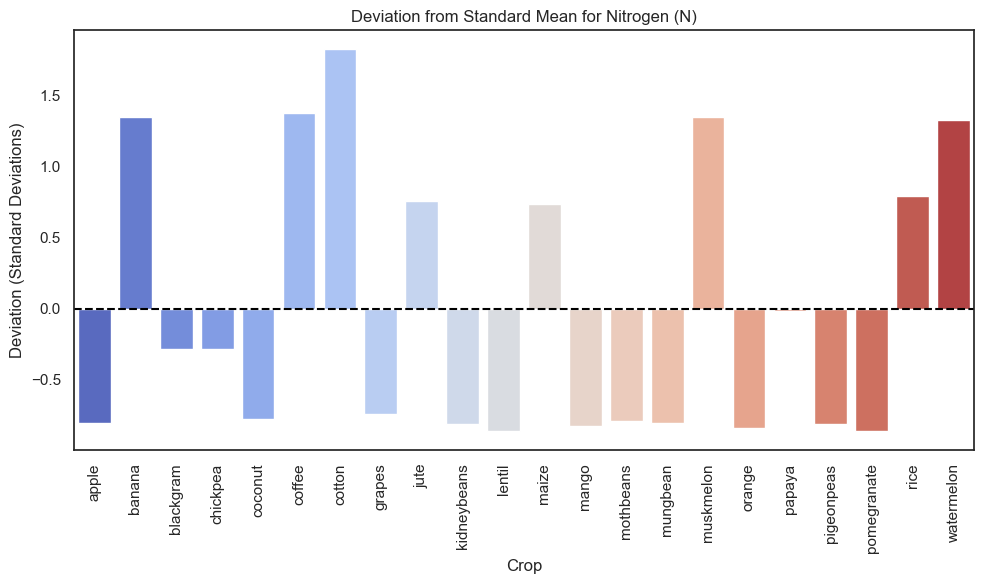

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=deviation_from_standard_mean.index, y=deviation_from_standard_mean['N'], palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Deviation from Standard Mean for Nitrogen (N)')
plt.xlabel('Crop')
plt.ylabel('Deviation (Standard Deviations)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

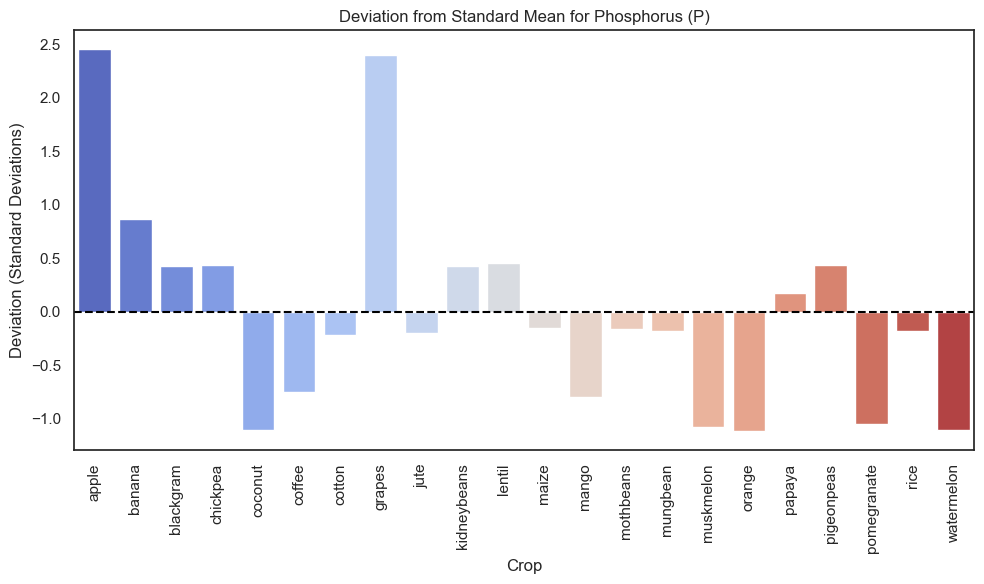

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=deviation_from_standard_mean.index, y=deviation_from_standard_mean['P'], palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Deviation from Standard Mean for Phosphorus (P)')
plt.xlabel('Crop')
plt.ylabel('Deviation (Standard Deviations)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

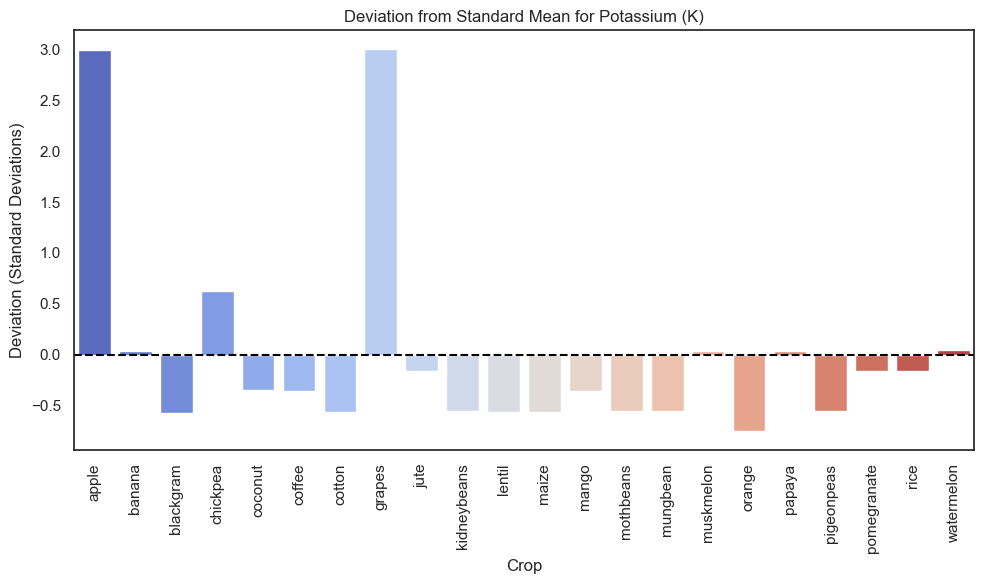

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x=deviation_from_standard_mean.index, y=deviation_from_standard_mean['K'], palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Deviation from Standard Mean for Potassium (K)')
plt.xlabel('Crop')
plt.ylabel('Deviation (Standard Deviations)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

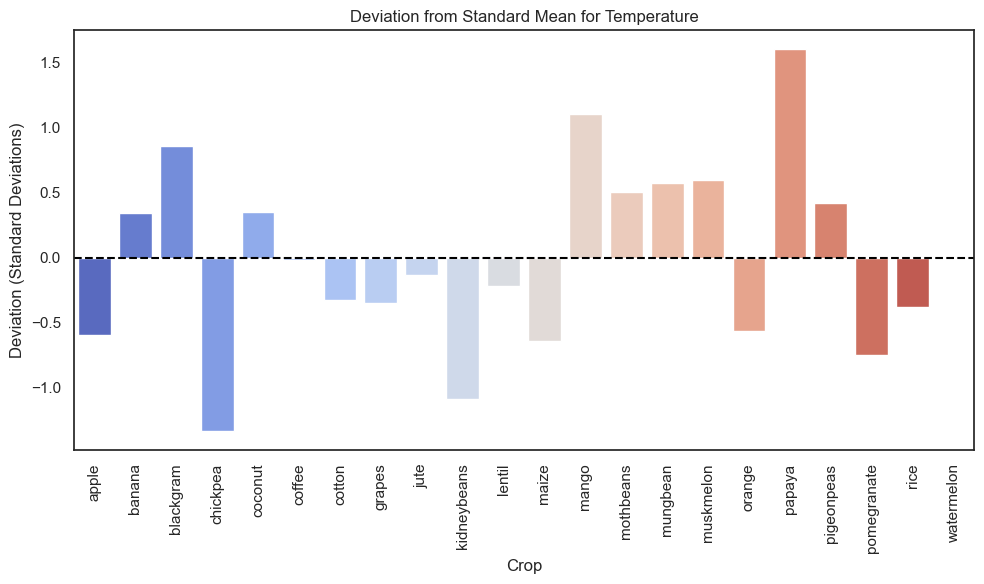

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x=deviation_from_standard_mean.index, y=deviation_from_standard_mean['temperature'], palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Deviation from Standard Mean for Temperature')
plt.xlabel('Crop')
plt.ylabel('Deviation (Standard Deviations)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

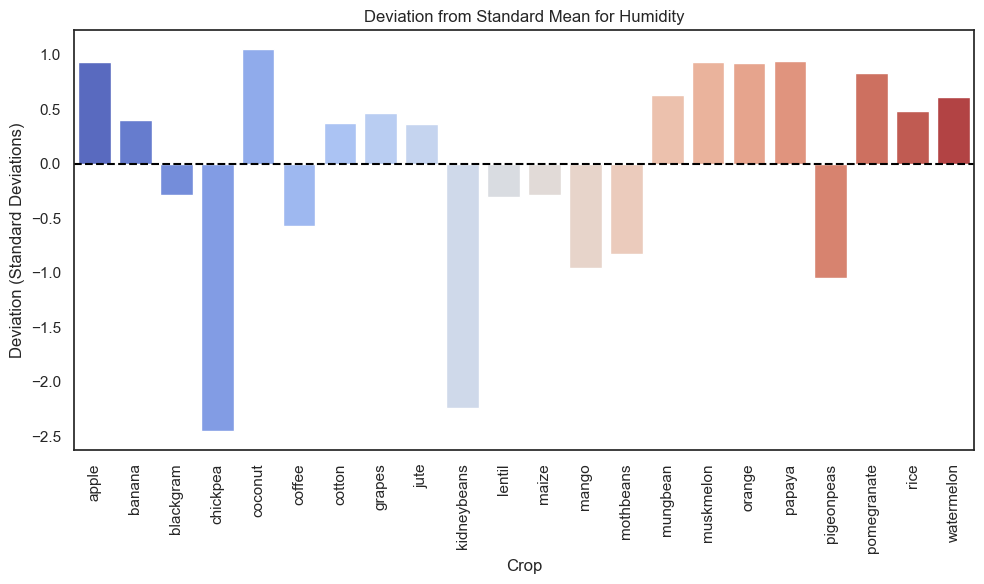

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x=deviation_from_standard_mean.index, y=deviation_from_standard_mean['humidity'], palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Deviation from Standard Mean for Humidity')
plt.xlabel('Crop')
plt.ylabel('Deviation (Standard Deviations)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

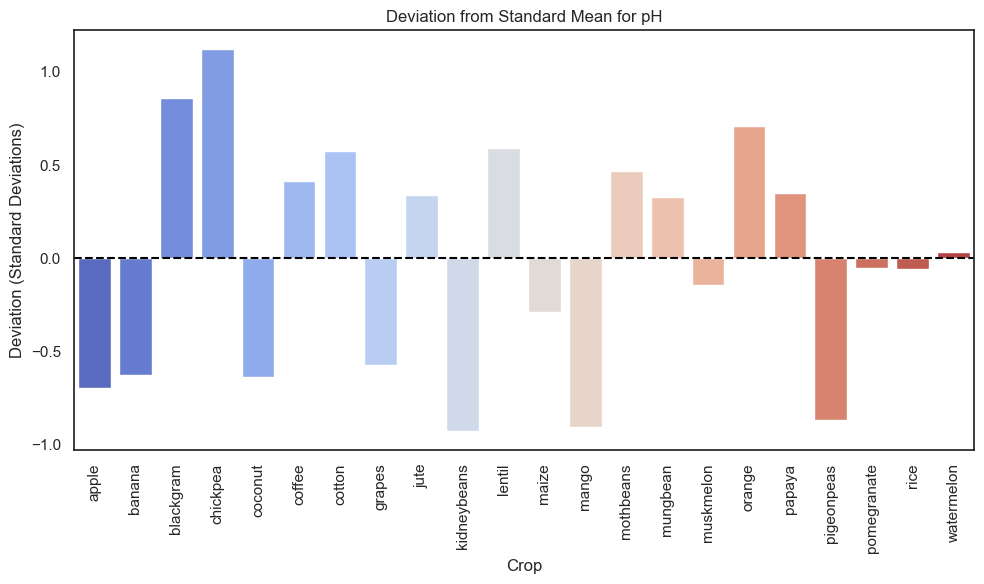

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x=deviation_from_standard_mean.index, y=deviation_from_standard_mean['ph'], palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Deviation from Standard Mean for pH')
plt.xlabel('Crop')
plt.ylabel('Deviation (Standard Deviations)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

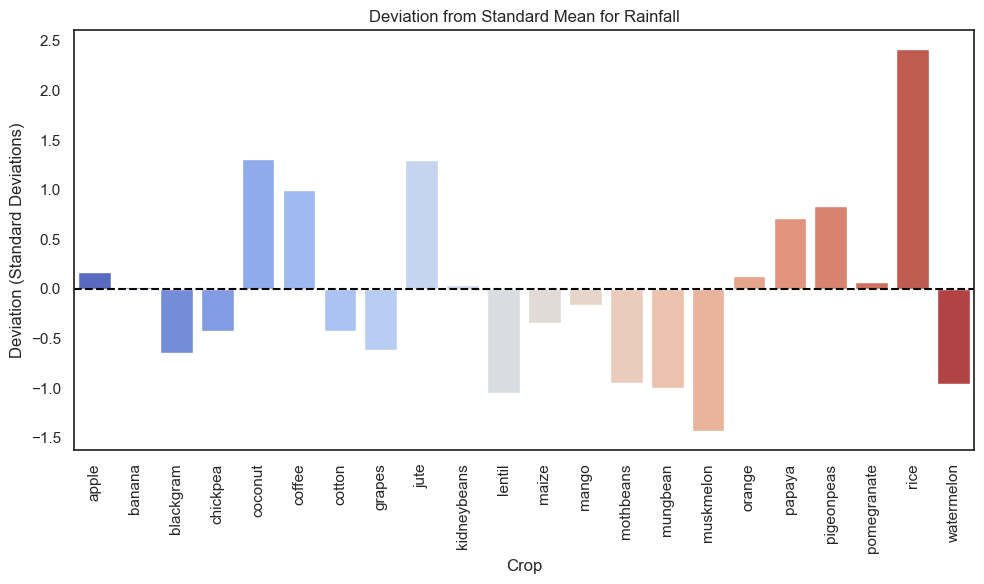

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x=deviation_from_standard_mean.index, y=deviation_from_standard_mean['rainfall'], palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Deviation from Standard Mean for Rainfall')
plt.xlabel('Crop')
plt.ylabel('Deviation (Standard Deviations)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1800x1000 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

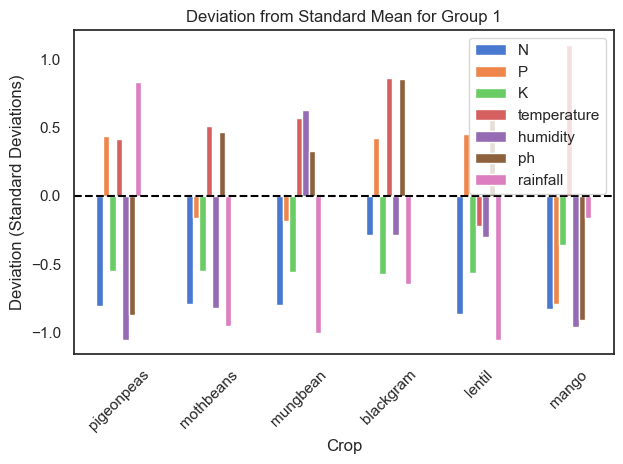

<Figure size 1200x600 with 0 Axes>

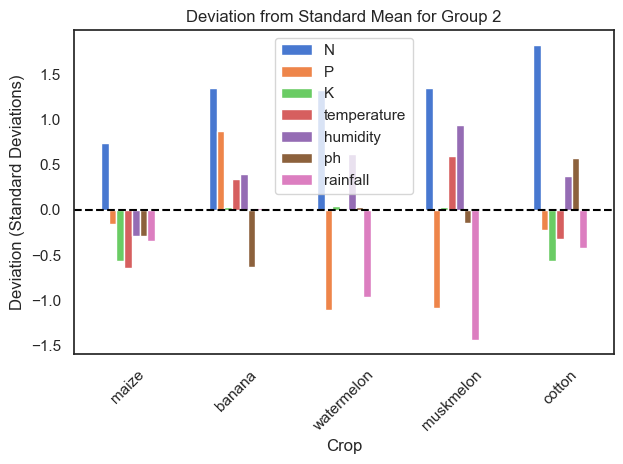

<Figure size 1200x600 with 0 Axes>

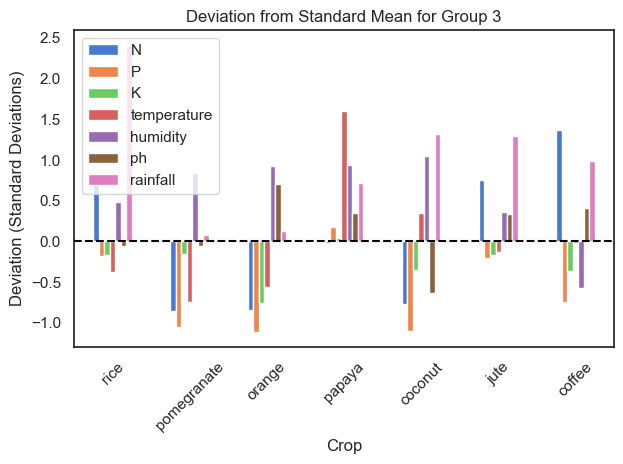

<Figure size 1200x600 with 0 Axes>

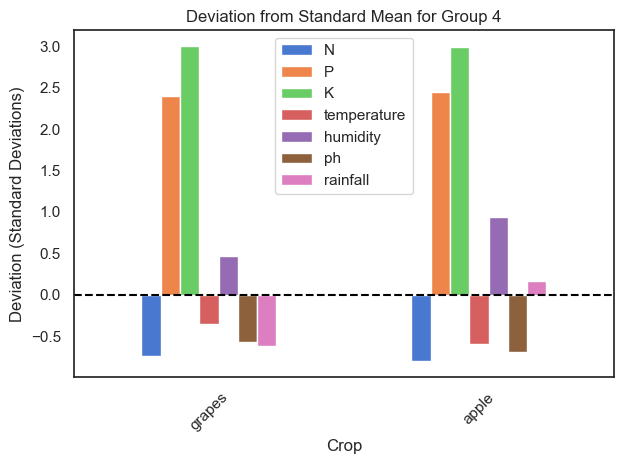

<Figure size 1200x600 with 0 Axes>

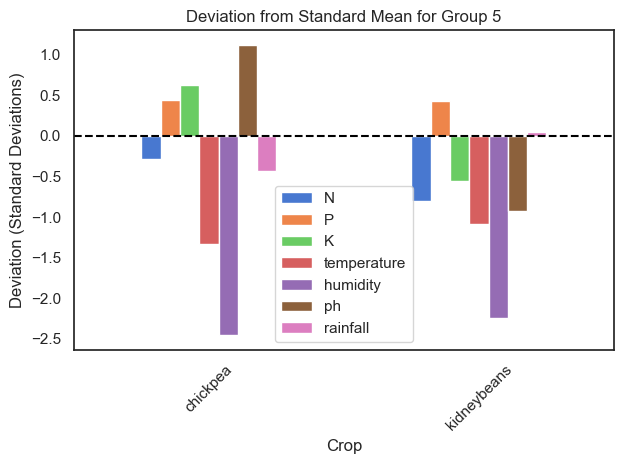

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Features to analyze
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Calculate the standard mean and standard deviation for each feature
standard_means = df[features].mean()
standard_stds = df[features].std()

# Group by crop and calculate the mean for each feature
crop_means = df.groupby('label')[features].mean()

# Calculate the deviation from the standard mean for each feature
deviation_from_standard_mean = (crop_means - standard_means) / standard_stds

# Manually assign crops to the specified groups based on deviation scores
groups = {
    'Group 1': ['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'mango'],
    'Group 2': ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton'],
    'Group 3': ['rice', 'pomegranate', 'orange', 'papaya', 'coconut', 'jute', 'coffee'],
    'Group 4': ['grapes', 'apple'],
    'Group 5': ['chickpea', 'kidneybeans']
}

# Create a dataframe to store the groups
grouped_crops = []

for group, crops in groups.items():
    for crop in crops:
        deviation_scores = deviation_from_standard_mean.loc[crop].values
        grouped_crops.append({'Crop': crop, 'Group': group, 'Deviation Scores': deviation_scores})

grouped_df = pd.DataFrame(grouped_crops)

# Plot bar plots for each group
plt.figure(figsize=(18, 10))
for group, group_df in grouped_df.groupby('Group'):
    plt.figure(figsize=(12, 6))
    group_deviation_means = group_df.set_index('Crop')['Deviation Scores'].apply(pd.Series)
    group_deviation_means.columns = features
    group_deviation_means.plot(kind='bar', stacked=False)
    plt.axhline(0, color='black', linestyle='--')
    plt.title(f'Deviation from Standard Mean for {group}')
    plt.xlabel('Crop')
    plt.ylabel('Deviation (Standard Deviations)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
